In [1]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data_df = pd.read_pickle('Combined_wrt_cosine_similarity_bert.pkl')
data_df

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened re...
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness ke...


In [2]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [3]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened re...
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness ke...


In [4]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [5]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened re...
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness ke...


In [6]:
# Let's take a look at our dataframe
data_df

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened re...
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness ke...


In [7]:
# pickle it for later use
data_df.to_pickle("corpus_LDA_on_BERT.pkl")

In [8]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,able,accepted,actually,afar,afraid,africa,aging,ago,air,alcoholic,...,worse,worst,write,writer,writing,written,wrote,year,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# pickle it for later use
data_dtm.to_pickle("dtm_LDA_on_BERT.pkl")

In [10]:
### pickle the cleaned data (before putting it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean_LDA_on_BERT.pkl')
pickle.dump(cv, open("count_vectorizer_LDA_on_BERT.pkl", "wb"))

In [11]:
data_clean

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened re...
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness ke...


In [12]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_LDA_on_BERT.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
able,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accepted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afraid,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Find the top 30 words found in each document
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('writer', 1),
  ('able', 0),
  ('poem', 0),
  ('performer', 0),
  ('perpetuated', 0),
  ('person', 0),
  ('piece', 0),
  ('pipeline', 0),
  ('pit', 0),
  ('place', 0),
  ('poet', 0),
  ('perfect', 0),
  ('point', 0),
  ('portal', 0),
  ('portion', 0),
  ('pose', 0),
  ('pray', 0),
  ('prefer', 0),
  ('pressure', 0),
  ('performance', 0),
  ('people', 0),
  ('previous', 0),
  ('painful', 0),
  ('olé', 0),
  ('open', 0),
  ('opportune', 0),
  ('order', 0),
  ('outcome', 0),
  ('overanticipated', 0),
  ('page', 0)],
 1: [('course', 1),
  ('book', 1),
  ('profession', 1),
  ('writing', 1),
  ('able', 0),
  ('person', 0),
  ('piece', 0),
  ('pipeline', 0),
  ('pit', 0),
  ('place', 0),
  ('poem', 0),
  ('point', 0),
  ('poet', 0),
  ('performer', 0),
  ('portal', 0),
  ('portion', 0),
  ('pose', 0),
  ('pray', 0),
  ('prefer', 0),
  ('pressure', 0),
  ('perpetuated', 0),
  ('performance', 0),
  ('previous', 0),
  ('perfect', 0),
  ('open', 0),
  ('opportune', 0),
  ('order', 0),
  ('o

In [14]:
# Print the top 15 words found in each document
for sentence, top_words in top_dict.items():
    print(sentence)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
writer, able, poem, performer, perpetuated, person, piece, pipeline, pit, place, poet, perfect, point, portal
---
1
course, book, profession, writing, able, person, piece, pipeline, pit, place, poem, point, poet, performer
---
2
fascination, lifelong, great, love, able, poet, person, piece, pipeline, pit, place, poem, portal, point
---
3
change, going, expect, nt, poem, perpetuated, person, piece, pipeline, pit, place, point, poet, performance
---
4
life, kind, recently, recalibrate, said, peculiar, caused, career, happened, work, relationship, live, portal, piece
---
5
thing, book, previous, called, international, unlike, megasensation, treat, memoir, love, people, went, peculiar, reason
---
6
doomed, able, nt, come, seriously, say, worried, going, afraid, like, prefer, place, performer, perpetuated
---
7
going, world, create, afraid, life, writing, book, anybody, nt, care, person, piece, pipeline, pit
---
8
know, reassuring, poem, performer, perpetuated, person, piece, pipeline, pi

In [15]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['writer',
 'able',
 'poem',
 'performer',
 'perpetuated',
 'person',
 'piece',
 'pipeline',
 'pit',
 'place',
 'poet',
 'perfect',
 'point',
 'portal',
 'portion',
 'pose',
 'pray',
 'prefer',
 'pressure',
 'performance',
 'people',
 'previous',
 'painful',
 'olé',
 'open',
 'opportune',
 'order',
 'outcome',
 'overanticipated',
 'page',
 'course',
 'book',
 'profession',
 'writing',
 'able',
 'person',
 'piece',
 'pipeline',
 'pit',
 'place',
 'poem',
 'point',
 'poet',
 'performer',
 'portal',
 'portion',
 'pose',
 'pray',
 'prefer',
 'pressure',
 'perpetuated',
 'performance',
 'previous',
 'perfect',
 'open',
 'opportune',
 'order',
 'outcome',
 'overanticipated',
 'page',
 'fascination',
 'lifelong',
 'great',
 'love',
 'able',
 'poet',
 'person',
 'piece',
 'pipeline',
 'pit',
 'place',
 'poem',
 'portal',
 'point',
 'performer',
 'portion',
 'pose',
 'pray',
 'prefer',
 'pressure',
 'perpetuated',
 'perfect',
 'performance',
 'paper',
 'opportune',
 'order',
 'outcome',
 'overa

In [16]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('poet', 118),
 ('point', 117),
 ('poem', 116),
 ('portal', 116),
 ('place', 115),
 ('portion', 112),
 ('pit', 111),
 ('piece', 109),
 ('pose', 108),
 ('pipeline', 107),
 ('pray', 107),
 ('person', 106),
 ('perpetuated', 104),
 ('performer', 95),
 ('prefer', 91),
 ('performance', 88),
 ('perfect', 80),
 ('order', 80),
 ('able', 79),
 ('pressure', 72),
 ('opportune', 72),
 ('outcome', 72),
 ('people', 60),
 ('open', 58),
 ('overanticipated', 58),
 ('page', 42),
 ('painful', 40),
 ('pretty', 37),
 ('olé', 36),
 ('pencil', 28),
 ('panicking', 27),
 ('nt', 23),
 ('know', 21),
 ('like', 20),
 ('previous', 19),
 ('work', 14),
 ('paper', 13),
 ('going', 13),
 ('sort', 13),
 ('peculiar', 12),
 ('thing', 12),
 ('think', 12),
 ('come', 11),
 ('creative', 11),
 ('life', 10),
 ('kind', 10),
 ('probably', 9),
 ('really', 9),
 ('right', 9),
 ('book', 8),
 ('said', 8),
 ('afraid', 8),
 ('year', 7),
 ('way', 7),
 ('want', 7),
 ('start', 7),
 ('time', 7),
 ('older', 7),
 ('paranormal', 7),
 ('genius',

In [17]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['poet',
 'point',
 'poem',
 'portal',
 'place',
 'portion',
 'pit',
 'piece',
 'pose',
 'pipeline',
 'pray',
 'person',
 'perpetuated',
 'performer',
 'prefer',
 'performance',
 'perfect',
 'order',
 'able',
 'pressure',
 'opportune',
 'outcome',
 'people',
 'open',
 'overanticipated',
 'page',
 'painful',
 'pretty',
 'olé',
 'pencil',
 'panicking',
 'nt',
 'know',
 'like',
 'previous',
 'work',
 'paper',
 'going',
 'sort',
 'peculiar',
 'thing',
 'think',
 'come',
 'creative',
 'life',
 'kind',
 'probably',
 'really',
 'right',
 'book',
 'said',
 'afraid',
 'year',
 'way',
 'want',
 'start',
 'time',
 'older',
 'paranormal',
 'genius']

In [18]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_LDA_on_BERT.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_LDA_on_BERT.pkl", "wb"))
data_stop.to_pickle("dtm_stop_LDA_on_BERT.pkl")

In [19]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

ValueError: We need at least 1 word to plot a word cloud, got 0.

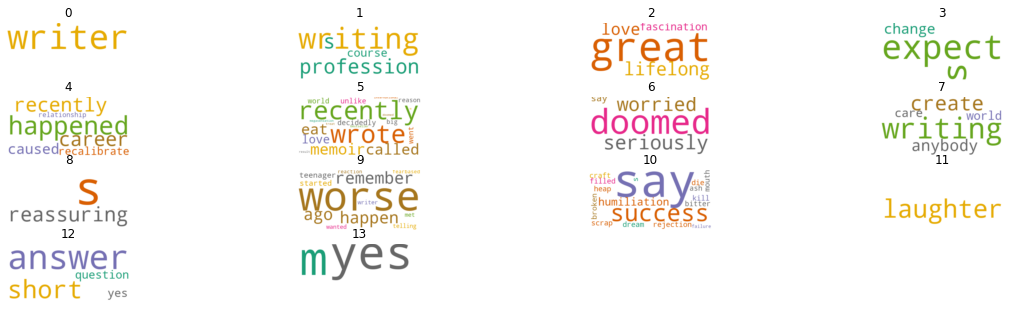

In [20]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 16]
id = []
for comedian, top_words in top_dict.items():
    id.append(comedian)
# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(12, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(id[index])
    
plt.show()

In [55]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop_LDA_on_BERT.pkl')
data

,accepted,actually,afar,africa,aging,ago,air,alcoholic,align,allah,...,worried,worse,worst,write,writer,writing,written,wrote,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [57]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
accepted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aging,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [59]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop_LDA_on_BERT.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [60]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

2022-05-06 23:42:52,140 : INFO : using symmetric alpha at 0.5
2022-05-06 23:42:52,142 : INFO : using symmetric eta at 0.5
2022-05-06 23:42:52,143 : INFO : using serial LDA version on this node
2022-05-06 23:42:52,144 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 126 documents, updating model once every 126 documents, evaluating perplexity every 126 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-06 23:42:52,217 : INFO : -7.208 per-word bound, 147.8 perplexity estimate based on a held-out corpus of 126 documents with 957 words
2022-05-06 23:42:52,218 : INFO : PROGRESS: pass 0, at document #126/126
2022-05-06 23:42:52,279 : INFO : topic #0 (0.500): 0.008*"process" + 0.008*"ve" + 0.007*"writing" + 0.007*"tom" + 0.006*"idea" + 0.006*"make" + 0.006*"question" + 0.006*"artist" + 0.006*"knew" + 0.005*"job"
2022-05-06 23:42:52,280 : INFO : topic #1 (0.500): 0.010*"allah" + 0.009*"god" + 0.009*"maybe" + 0.008*"laught

[(0,
  '0.010*"process" + 0.010*"ve" + 0.009*"writing" + 0.007*"idea" + 0.007*"tom" + 0.007*"started" + 0.007*"question" + 0.006*"heard" + 0.006*"completely" + 0.006*"thought"'),
 (1,
  '0.011*"allah" + 0.010*"god" + 0.010*"maybe" + 0.008*"ancient" + 0.008*"dance" + 0.007*"laughter" + 0.007*"believed" + 0.006*"ve" + 0.006*"creativity" + 0.006*"century"')]

In [61]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

2022-05-06 23:42:52,823 : INFO : using symmetric alpha at 0.25
2022-05-06 23:42:52,825 : INFO : using symmetric eta at 0.25
2022-05-06 23:42:52,826 : INFO : using serial LDA version on this node
2022-05-06 23:42:52,828 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 126 documents, updating model once every 126 documents, evaluating perplexity every 126 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-06 23:42:52,891 : INFO : -8.473 per-word bound, 355.3 perplexity estimate based on a held-out corpus of 126 documents with 957 words
2022-05-06 23:42:52,892 : INFO : PROGRESS: pass 0, at document #126/126
2022-05-06 23:42:52,946 : INFO : topic #0 (0.250): 0.014*"god" + 0.014*"allah" + 0.012*"make" + 0.009*"feel" + 0.009*"maybe" + 0.009*"thought" + 0.006*"writing" + 0.006*"job" + 0.006*"glimpse" + 0.006*"recently"
2022-05-06 23:42:52,946 : INFO : topic #1 (0.250): 0.013*"laughter" + 0.011*"writing" + 0.011*"ve" + 0.

2022-05-06 23:42:53,240 : INFO : topic diff=0.011666, rho=0.353553
2022-05-06 23:42:53,274 : INFO : -6.795 per-word bound, 111.1 perplexity estimate based on a held-out corpus of 126 documents with 957 words
2022-05-06 23:42:53,274 : INFO : PROGRESS: pass 7, at document #126/126
2022-05-06 23:42:53,293 : INFO : topic #0 (0.250): 0.024*"allah" + 0.021*"god" + 0.010*"thought" + 0.010*"make" + 0.009*"feel" + 0.009*"maybe" + 0.009*"tom" + 0.007*"job" + 0.007*"dancer" + 0.007*"recently"
2022-05-06 23:42:53,294 : INFO : topic #1 (0.250): 0.016*"laughter" + 0.011*"writing" + 0.011*"ve" + 0.011*"process" + 0.011*"heard" + 0.011*"writer" + 0.009*"great" + 0.008*"got" + 0.008*"started" + 0.008*"look"
2022-05-06 23:42:53,294 : INFO : topic #2 (0.250): 0.015*"human" + 0.015*"ancient" + 0.012*"divine" + 0.012*"creativity" + 0.012*"came" + 0.012*"maybe" + 0.012*"believed" + 0.012*"dance" + 0.011*"question" + 0.010*"idea"
2022-05-06 23:42:53,295 : INFO : topic #3 (0.250): 0.009*"ve" + 0.009*"knew" + 

[(0,
  '0.024*"allah" + 0.021*"god" + 0.010*"thought" + 0.009*"make" + 0.009*"feel" + 0.009*"maybe" + 0.009*"tom" + 0.007*"job" + 0.007*"dancer" + 0.007*"recently"'),
 (1,
  '0.016*"laughter" + 0.011*"writing" + 0.011*"ve" + 0.011*"process" + 0.011*"heard" + 0.011*"writer" + 0.009*"great" + 0.008*"got" + 0.008*"century" + 0.008*"started"'),
 (2,
  '0.015*"human" + 0.015*"ancient" + 0.012*"divine" + 0.012*"creativity" + 0.012*"came" + 0.012*"maybe" + 0.012*"believed" + 0.012*"dance" + 0.011*"question" + 0.010*"idea"'),
 (3,
  '0.009*"knew" + 0.009*"ve" + 0.009*"chemical" + 0.009*"lit" + 0.009*"artist" + 0.009*"brilliant" + 0.009*"doomed" + 0.009*"hell" + 0.008*"process" + 0.006*"talking"')]

In [62]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [63]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean_LDA_on_BERT.pkl')
data_clean

,transcript
0,i writer
1,writing book profession s course
2,it also great lifelong love fascination
3,and i nt expect s ever going change
4,but said something kind peculiar happened recently life career caused recalibrate whole relationship work
...,...
121,and olé nonetheless
122,i believe i feel must teach
123,olé
124,nonetheless sheer human love stubbornness keep showing thank applause thank


In [64]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
0,writer
1,book profession s course
2,love fascination
3,nt change
4,something kind life career relationship work
...,...
121,
122,feel
123,olé
124,sheer love stubbornness applause thank


In [65]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,afar,afraid,air,allah,ancient,angeles,anguish,answer,anxiety,anybody,...,wake,way,wisdom,wonderment,word,work,world,writer,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [67]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

2022-05-06 23:42:53,685 : INFO : using symmetric alpha at 0.25
2022-05-06 23:42:53,687 : INFO : using symmetric eta at 0.25
2022-05-06 23:42:53,689 : INFO : using serial LDA version on this node
2022-05-06 23:42:53,689 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 126 documents, updating model once every 126 documents, evaluating perplexity every 126 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-06 23:42:53,742 : INFO : -7.682 per-word bound, 205.4 perplexity estimate based on a held-out corpus of 126 documents with 561 words
2022-05-06 23:42:53,743 : INFO : PROGRESS: pass 0, at document #126/126
2022-05-06 23:42:53,785 : INFO : topic #0 (0.250): 0.026*"work" + 0.026*"thing" + 0.023*"allah" + 0.022*"idea" + 0.022*"process" + 0.016*"god" + 0.014*"success" + 0.014*"year" + 0.013*"way" + 0.013*"poem"
2022-05-06 23:42:53,785 : INFO : topic #1 (0.250): 0.040*"work" + 0.027*"sort" + 0.027*"life" + 0.017*"way" + 

2022-05-06 23:42:54,087 : INFO : topic diff=0.007940, rho=0.353553
2022-05-06 23:42:54,114 : INFO : -6.151 per-word bound, 71.1 perplexity estimate based on a held-out corpus of 126 documents with 561 words
2022-05-06 23:42:54,114 : INFO : PROGRESS: pass 7, at document #126/126
2022-05-06 23:42:54,134 : INFO : topic #0 (0.250): 0.030*"thing" + 0.029*"allah" + 0.026*"work" + 0.022*"olé" + 0.022*"process" + 0.022*"idea" + 0.019*"god" + 0.014*"success" + 0.013*"poem" + 0.013*"year"
2022-05-06 23:42:54,135 : INFO : topic #1 (0.250): 0.042*"work" + 0.031*"sort" + 0.027*"life" + 0.022*"thing" + 0.021*"way" + 0.016*"artist" + 0.016*"divine" + 0.012*"source" + 0.012*"question" + 0.012*"book"
2022-05-06 23:42:54,135 : INFO : topic #2 (0.250): 0.035*"kind" + 0.019*"reputation" + 0.019*"engineer" + 0.019*"chemical" + 0.018*"laughter" + 0.018*"way" + 0.013*"applause" + 0.013*"century" + 0.013*"life" + 0.013*"mind"
2022-05-06 23:42:54,136 : INFO : topic #3 (0.250): 0.032*"book" + 0.031*"dance" + 0.

[(0,
  '0.030*"thing" + 0.029*"allah" + 0.026*"work" + 0.023*"olé" + 0.022*"process" + 0.022*"idea" + 0.020*"god" + 0.014*"success" + 0.013*"poem" + 0.013*"year"'),
 (1,
  '0.042*"work" + 0.031*"sort" + 0.027*"life" + 0.023*"thing" + 0.021*"way" + 0.016*"artist" + 0.016*"divine" + 0.012*"source" + 0.012*"question" + 0.012*"book"'),
 (2,
  '0.035*"kind" + 0.019*"laughter" + 0.019*"reputation" + 0.019*"engineer" + 0.019*"chemical" + 0.018*"way" + 0.013*"applause" + 0.013*"century" + 0.013*"mind" + 0.013*"life"'),
 (3,
  '0.032*"book" + 0.031*"dance" + 0.025*"job" + 0.020*"genius" + 0.019*"nt" + 0.014*"year" + 0.014*"love" + 0.014*"today" + 0.013*"moment" + 0.013*"hour"')]

In [68]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [69]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
0,i writer
1,book profession s course
2,great lifelong love fascination
3,nt s change
4,something kind peculiar life career recalibrate whole relationship work
...,...
121,
122,i i feel
123,olé
124,sheer human love stubbornness thank applause thank


In [70]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,able,afar,afraid,africa,air,alcoholic,allah,aloud,american,ancient,...,wonderment,wondrous,word,work,world,worst,writer,year,yes,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [72]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=80)
ldana.print_topics()

2022-05-06 23:42:54,646 : INFO : using symmetric alpha at 0.2
2022-05-06 23:42:54,648 : INFO : using symmetric eta at 0.2
2022-05-06 23:42:54,649 : INFO : using serial LDA version on this node
2022-05-06 23:42:54,651 : INFO : running online (multi-pass) LDA training, 5 topics, 80 passes over the supplied corpus of 126 documents, updating model once every 126 documents, evaluating perplexity every 126 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-06 23:42:54,707 : INFO : -8.727 per-word bound, 423.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:54,709 : INFO : PROGRESS: pass 0, at document #126/126
2022-05-06 23:42:54,750 : INFO : topic #0 (0.200): 0.032*"thing" + 0.028*"allah" + 0.021*"laughter" + 0.018*"olé" + 0.017*"god" + 0.017*"creative" + 0.015*"sort" + 0.014*"life" + 0.014*"creativity" + 0.011*"work"
2022-05-06 23:42:54,751 : INFO : topic #1 (0.200): 0.016*"life" + 0.016*"dancer" + 0.016*"way" + 0.011*"

2022-05-06 23:42:55,012 : INFO : topic diff=0.007990, rho=0.377964
2022-05-06 23:42:55,043 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:55,044 : INFO : PROGRESS: pass 6, at document #126/126
2022-05-06 23:42:55,060 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.020*"laughter" + 0.020*"olé" + 0.017*"god" + 0.017*"creative" + 0.014*"sort" + 0.014*"creativity" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:55,061 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"life" + 0.017*"dancer" + 0.017*"job" + 0.012*"genius" + 0.011*"today" + 0.011*"year" + 0.011*"nt" + 0.011*"rational" + 0.011*"bit"
2022-05-06 23:42:55,061 : INFO : topic #2 (0.200): 0.019*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.013*"work" + 0.012*"year" + 0.012*"anybody" + 0.012*"artist" + 0.012*"engineer" + 0.012*"century"
2022-05-06 23:42:55,061 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.0

2022-05-06 23:42:55,322 : INFO : PROGRESS: pass 12, at document #126/126
2022-05-06 23:42:55,342 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:55,342 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"nt" + 0.011*"rational" + 0.011*"bit"
2022-05-06 23:42:55,343 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"work" + 0.012*"year" + 0.012*"artist" + 0.012*"anybody" + 0.012*"engineer" + 0.012*"century"
2022-05-06 23:42:55,343 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"ancient" + 0.013*"kind" + 0.013*"piece" + 0.010*"house"
2022-05-06 23:42:55,344 : INFO : topic #4 (0.200): 0.043*"work" + 0.012*"genius" + 0

2022-05-06 23:42:55,610 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"nt" + 0.011*"rational" + 0.011*"bit"
2022-05-06 23:42:55,610 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"work" + 0.012*"year" + 0.012*"artist" + 0.012*"anybody" + 0.012*"century" + 0.012*"engineer"
2022-05-06 23:42:55,611 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:55,612 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"book" + 0.012*"thank" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:55,612 : INFO : topic diff=0.000092, rho=0.223607
2022-05-06 23:42:55,639 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a hel

2022-05-06 23:42:55,878 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"work" + 0.012*"year" + 0.012*"artist" + 0.012*"century" + 0.012*"anybody" + 0.012*"engineer"
2022-05-06 23:42:55,879 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:55,879 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:55,880 : INFO : topic diff=0.000022, rho=0.196116
2022-05-06 23:42:55,905 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:55,905 : INFO : PROGRESS: pass 25, at document #126/126
2022-05-06 23:42:55,920 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.

2022-05-06 23:42:56,140 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:56,141 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:56,142 : INFO : topic diff=0.000006, rho=0.176777
2022-05-06 23:42:56,165 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:56,166 : INFO : PROGRESS: pass 31, at document #126/126
2022-05-06 23:42:56,195 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:56,196 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"lif

2022-05-06 23:42:56,422 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:56,422 : INFO : topic diff=0.000002, rho=0.162221
2022-05-06 23:42:56,449 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:56,449 : INFO : PROGRESS: pass 37, at document #126/126
2022-05-06 23:42:56,465 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:56,466 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:56,466 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016

2022-05-06 23:42:56,689 : INFO : topic diff=0.000001, rho=0.150756
2022-05-06 23:42:56,721 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:56,721 : INFO : PROGRESS: pass 43, at document #126/126
2022-05-06 23:42:56,743 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:56,744 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:56,745 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"work" + 0.012*"artist" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"
2022-05-06 23:42:56,746 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" 

2022-05-06 23:42:57,023 : INFO : PROGRESS: pass 49, at document #126/126
2022-05-06 23:42:57,039 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:57,040 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:57,040 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"artist" + 0.012*"work" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"
2022-05-06 23:42:57,041 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:57,041 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius"

2022-05-06 23:42:57,308 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:57,309 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"artist" + 0.012*"work" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"
2022-05-06 23:42:57,310 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:57,311 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:57,311 : INFO : topic diff=0.000000, rho=0.132453
2022-05-06 23:42:57,336 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a

2022-05-06 23:42:57,571 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"artist" + 0.012*"work" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"
2022-05-06 23:42:57,572 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:57,572 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:57,573 : INFO : topic diff=0.000000, rho=0.125988
2022-05-06 23:42:57,598 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:57,598 : INFO : PROGRESS: pass 62, at document #126/126
2022-05-06 23:42:57,612 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 

2022-05-06 23:42:57,834 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:57,834 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:57,835 : INFO : topic diff=0.000000, rho=0.120386
2022-05-06 23:42:57,859 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:57,860 : INFO : PROGRESS: pass 68, at document #126/126
2022-05-06 23:42:57,875 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:57,875 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"lif

2022-05-06 23:42:58,092 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"
2022-05-06 23:42:58,092 : INFO : topic diff=0.000000, rho=0.115470
2022-05-06 23:42:58,118 : INFO : -6.535 per-word bound, 92.7 perplexity estimate based on a held-out corpus of 126 documents with 823 words
2022-05-06 23:42:58,118 : INFO : PROGRESS: pass 74, at document #126/126
2022-05-06 23:42:58,133 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:58,134 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:58,135 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016

2022-05-06 23:42:58,352 : INFO : topic diff=0.000000, rho=0.111111
2022-05-06 23:42:58,353 : INFO : topic #0 (0.200): 0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"
2022-05-06 23:42:58,354 : INFO : topic #1 (0.200): 0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"
2022-05-06 23:42:58,354 : INFO : topic #2 (0.200): 0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"artist" + 0.012*"work" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"
2022-05-06 23:42:58,355 : INFO : topic #3 (0.200): 0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"
2022-05-06 23:42:58,355 : INFO : topic #4 (0.200): 0.044*"work" + 0.012*"genius" + 0.0

[(0,
  '0.034*"thing" + 0.027*"allah" + 0.021*"olé" + 0.021*"laughter" + 0.017*"god" + 0.017*"creative" + 0.014*"creativity" + 0.014*"sort" + 0.014*"life" + 0.011*"genius"'),
 (1,
  '0.022*"way" + 0.017*"job" + 0.017*"life" + 0.017*"dancer" + 0.012*"genius" + 0.012*"today" + 0.012*"year" + 0.011*"rational" + 0.011*"nt" + 0.011*"fairy"'),
 (2,
  '0.020*"creative" + 0.016*"kind" + 0.016*"sort" + 0.016*"chemical" + 0.012*"year" + 0.012*"artist" + 0.012*"work" + 0.012*"century" + 0.012*"anybody" + 0.012*"reputation"'),
 (3,
  '0.035*"nt" + 0.016*"afraid" + 0.016*"poem" + 0.016*"dance" + 0.013*"book" + 0.013*"thing" + 0.013*"piece" + 0.013*"ancient" + 0.013*"kind" + 0.010*"house"'),
 (4,
  '0.044*"work" + 0.012*"genius" + 0.012*"poet" + 0.012*"landscape" + 0.012*"thank" + 0.012*"book" + 0.012*"idea" + 0.012*"process" + 0.007*"year" + 0.007*"love"')]

In [73]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for a in corpus_transformed], data_dtmna.index))

[([(0, 0.10000762),
   (1, 0.5999649),
   (2, 0.10000845),
   (3, 0.100007296),
   (4, 0.100011736)],
  0),
 ([(0, 0.050293982),
   (1, 0.05020232),
   (2, 0.05014454),
   (3, 0.050624),
   (4, 0.79873514)],
  1),
 ([(0, 0.040112056),
   (1, 0.040010203),
   (2, 0.8389967),
   (3, 0.04024064),
   (4, 0.040640417)],
  2),
 ([(0, 0.06674741),
   (1, 0.069044665),
   (2, 0.06686757),
   (3, 0.73065954),
   (4, 0.06668082)],
  3),
 ([(0, 0.025444264),
   (1, 0.02534956),
   (2, 0.02554978),
   (3, 0.89805526),
   (4, 0.025601154)],
  4),
 ([(0, 0.9525666),
   (1, 0.011855806),
   (2, 0.011785331),
   (3, 0.011926852),
   (4, 0.011865354)],
  5),
 ([(0, 0.040131204),
   (1, 0.040665377),
   (2, 0.04018075),
   (3, 0.8390144),
   (4, 0.040008254)],
  6),
 ([(0, 0.022595903),
   (1, 0.9088841),
   (2, 0.022685833),
   (3, 0.023315653),
   (4, 0.022518529)],
  7),
 ([(0, 0.10001669),
   (1, 0.10002462),
   (2, 0.10001851),
   (3, 0.10001597),
   (4, 0.5999242)],
  8),
 ([(0, 0.034097586),
   (

In [74]:
sent_topics_df = pd.DataFrame()
for i, row_list in enumerate(ldana[corpusna]):
        row = row_list[0] if ldana.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldana.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
sent_topics_df.columns = ['Dom_Topic', 'Topic_Contri', 'Keywords']
for i in range(len(sent_topics_df)):
    print(sent_topics_df.loc[i].at['Dom_Topic'])

1.0
4.0
2.0
3.0
3.0
0.0
3.0
1.0
4.0
1.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
3.0
2.0
2.0
0.0
2.0
1.0
2.0
1.0
2.0
3.0
4.0
2.0
4.0
3.0
0.0
0.0
0.0
4.0
3.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
3.0
4.0
3.0
0.0
0.0
1.0
4.0
3.0
3.0
2.0
2.0
0.0
3.0
1.0
3.0
1.0
2.0
4.0
4.0
4.0
3.0
3.0
3.0
0.0
3.0
0.0
4.0
0.0
1.0
2.0
0.0
2.0
3.0
4.0
4.0
0.0
3.0
4.0
2.0
4.0
4.0
0.0
0.0
1.0
3.0
1.0
2.0
2.0
3.0
4.0
3.0
1.0
3.0
1.0
3.0
1.0
3.0
3.0
0.0
0.0
0.0
4.0
1.0
2.0
1.0
4.0
0.0
0.0
1.0
3.0
3.0
1.0
3.0
3.0
4.0
3.0
0.0
3.0
0.0
4.0
2.0


In [75]:
# data = {}
# sentences = ""
# corpus = pd.read_pickle("corpus.pkl")
# corpus
# i=0
# a=0
# z=0
# x=0
# b=0
# unique_topics = []
# while(a<len(sent_topics_df)-1):
#     sentences = data_clean.loc[a].at['transcript']
#     if(sent_topics_df.loc[a].at["Dom_Topic"] == sent_topics_df.loc[a+1].at["Dom_Topic"]):
#         while((a<len(sent_topics_df)-1) and (sent_topics_df.loc[a].at["Dom_Topic"] == sent_topics_df.loc[a+1].at["Dom_Topic"])):
#             sentences += data_clean.loc[a+1].at['transcript']
#             a+=1
#     unique_topics.append(sent_topics_df.loc[a].at['Dom_Topic'])
#     data[i] = sentences
#     i+=1
#     a+=1
# if(a<len(sent_topics_df)):
#     data[i] = sentences = data_clean.loc[a].at['transcript']
# data

In [76]:
data = {}
sentences = ""
corpus = pd.read_pickle("corpus.pkl")
corpus
i=0
a=0
j=1
b=0
merged_sentences = []
unique_topics = []
time_and_sentences = pd.read_pickle('time_and_sentences.pkl')
keys = list(time_and_sentences.keys())
values = list(time_and_sentences.values())
to_minus = []


while(a<len(sent_topics_df)-1):
    sentences = data_clean.loc[a].at['transcript']
    if(sent_topics_df.loc[a].at["Dom_Topic"] == sent_topics_df.loc[a+1].at["Dom_Topic"]):
        while((a<len(sent_topics_df)-1) and (sent_topics_df.loc[a].at["Dom_Topic"] == sent_topics_df.loc[a+1].at["Dom_Topic"])):
            sentences += data_clean.loc[a+1].at['transcript']
            b+=1
            j+=1
            a+=1
        merged_sentences.append(a)
        to_minus.append(b)
    unique_topics.append(sent_topics_df.loc[a].at['Dom_Topic'])
    data[i] = sentences
    i+=1
    a+=1
if(a<len(sent_topics_df)):
    data[i] = sentences = data_clean.loc[a].at['transcript']
    unique_topics.append(sent_topics_df.loc[a].at['Dom_Topic'])


# values.sort()

pickle.dump(time_and_sentences, open("time_and_sentences.pkl", "wb" ))

In [77]:
to_minus

[1, 6, 7, 8, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28]

In [78]:
merged_sentences

[4,
 16,
 18,
 21,
 35,
 39,
 49,
 53,
 55,
 64,
 67,
 79,
 85,
 87,
 92,
 102,
 105,
 112,
 115,
 118]

In [79]:
i=1
j=0
a=0
print(values)
while(i < len(values)):
    while(j < len(merged_sentences) and merged_sentences[j] <= values[i]):
        a+=1
        j+=1
        
    values[i] = values[i] - a
    a=0
    j=0
    i+=1

time_and_sentences = dict(zip(keys, values))

print(values)        

[0, 10, 15, 16, 28, 34, 40, 47, 48, 52, 58, 61, 67, 71, 76, 83, 88, 99, 100, 107, 109, 112, 117, 121, 125, 137, 144, 150, 158, 159, 171, 172, 173, 174]
[0, 9, 14, 14, 24, 30, 34, 41, 42, 45, 49, 52, 56, 60, 65, 71, 74, 84, 85, 90, 92, 94, 98, 101, 105, 117, 124, 130, 138, 139, 151, 152, 153, 154]


In [80]:
# a=0
# i=0
# j=0
# flag = 0
# print(values)
# while(i<len(merged_sentences)):
#     while(values[a] <= merged_sentences[i]):
#         print(temp_value[i])
# #         if(a==len(values)):
# #             flag = 1
# #             break
#         values[a] = values[a] - temp_value[i]
#         a+=1
#         j+=1
# #     if(flag == 1):
# #         break
#     i+=1
#     j=0
# while(a<len(values)):
#     values[a] = values[a] - temp_value[len(temp_value)-1]
#     a+=1
# print(values)

In [81]:
# for i in range(len(temp)):
#     values[i] = values[i] - temp[i]
time_and_sentences = dict(zip(keys, values))
time_and_sentences

{'00:00': 0,
 '01:07': 9,
 '01:39': 14,
 '01:42': 14,
 '02:53': 24,
 '03:53': 30,
 '04:17': 34,
 '05:11': 41,
 '05:14': 42,
 '05:58': 45,
 '06:35': 49,
 '07:05': 52,
 '07:34': 56,
 '08:10': 60,
 '08:47': 65,
 '09:30': 71,
 '09:59': 74,
 '11:31': 84,
 '11:40': 85,
 '12:17': 90,
 '12:41': 92,
 '13:05': 94,
 '13:26': 98,
 '13:44': 101,
 '14:14': 105,
 '15:17': 117,
 '16:14': 124,
 '16:58': 130,
 '17:55': 138,
 '18:09': 139,
 '18:51': 151,
 '18:53': 152,
 '18:56': 153,
 '19:01': 154}

In [82]:
# We are going to change this to key: sentence_id, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

In [83]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
data_combined

{0: [' i writer '],
 1: ['writing book profession s  course '],
 2: ['it also great lifelong love fascination '],
 3: ['and i nt expect s ever going change but  said  something kind peculiar happened recently life career  caused recalibrate whole relationship work '],
 4: ['and peculiar thing i recently wrote book  memoir called  eat  pray  love   decidedly unlike previous book  went world reason  became big  megasensation  international bestseller thing the result everywhere i go  people treat like i m doomed '],
 5: ['seriously  doomed  doomed like  come  worried  say   are nt afraid re never going able top '],
 6: ['are nt afraid re going keep writing whole life re never going create book anybody world care  ever  '],
 7: [' so s reassuring  know '],
 8: ['but would worse  except i happen remember  year ago  i teenager  i first started telling people i wanted writer  i met sort fearbased reaction '],
 9: ['and people would say   are nt afraid re never going success are nt afraid hum

In [84]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

combined_sent = pd.DataFrame.from_dict(data_combined).transpose()
combined_sent.columns = ['transcript']
combined_sent = combined_sent.sort_index()
combined_sent['topics'] = unique_topics

cols = combined_sent.columns.tolist()
column_to_move = "topics"
new_position = 0

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
combined_sent = combined_sent[cols]

combined_sent

,topics,transcript
0,1.0,i writer
1,4.0,writing book profession s course
2,2.0,it also great lifelong love fascination
3,3.0,and i nt expect s ever going change but said something kind peculiar happened recently life career caused recalibrate whole relationship work
4,0.0,and peculiar thing i recently wrote book memoir called eat pray love decidedly unlike previous book went world reason became big megasens...
...,...,...
93,0.0,and olé nonetheless
94,3.0,i believe i feel must teach
95,0.0,olé
96,4.0,nonetheless sheer human love stubbornness keep showing thank applause thank


In [85]:
# pickle it for later use
combined_sent.to_pickle("Combined_wrt_topics_LDA_on_BERT.pkl")

In [86]:
time_and_sentences

{'00:00': 0,
 '01:07': 9,
 '01:39': 14,
 '01:42': 14,
 '02:53': 24,
 '03:53': 30,
 '04:17': 34,
 '05:11': 41,
 '05:14': 42,
 '05:58': 45,
 '06:35': 49,
 '07:05': 52,
 '07:34': 56,
 '08:10': 60,
 '08:47': 65,
 '09:30': 71,
 '09:59': 74,
 '11:31': 84,
 '11:40': 85,
 '12:17': 90,
 '12:41': 92,
 '13:05': 94,
 '13:26': 98,
 '13:44': 101,
 '14:14': 105,
 '15:17': 117,
 '16:14': 124,
 '16:58': 130,
 '17:55': 138,
 '18:09': 139,
 '18:51': 151,
 '18:53': 152,
 '18:56': 153,
 '19:01': 154}